<a href="https://colab.research.google.com/github/pranayb-konverge/data-analysis-for-python/blob/main/pandas_dataframe_bike_store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bike store sales**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Print the data in the sales_data.csv file

In [ ]:
!head data/sales_data.csv

Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
2014-05-22,22,May,2014,4

load the data in sales object of pandas using pd.read_csv method and order by Date.

In [ ]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])

Get the first row or all the data in visual representation.

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


Get the count or (rows,columns)

In [ ]:
sales.shape

(47125, 18)

Get the information of the table columns and the data type

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47125 entries, 0 to 47124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              47125 non-null  datetime64[ns]
 1   Day               47125 non-null  int64         
 2   Month             47125 non-null  object        
 3   Year              47125 non-null  int64         
 4   Customer_Age      47125 non-null  int64         
 5   Age_Group         47125 non-null  object        
 6   Customer_Gender   47124 non-null  object        
 7   Country           47124 non-null  object        
 8   State             47124 non-null  object        
 9   Product_Category  47124 non-null  object        
 10  Sub_Category      47124 non-null  object        
 11  Product           47124 non-null  object        
 12  Order_Quantity    47124 non-null  float64       
 13  Unit_Cost         47124 non-null  float64       
 14  Unit_Price        4712

Get the chopdown of all the numerical columns.

In [ ]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,47125.000000,47125.000000,47125.000000,47124.000000,47124.000000,47124.000000,47124.000000,47124.000000,47124.000000
mean,15.615873,2014.571289,36.166069,14.923797,11.104745,24.388167,150.928487,156.269820,307.198307
std,8.809985,1.115761,11.033984,8.685545,11.729465,23.427309,172.500352,196.389089,323.011612
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,-25.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,7.000000,3.000000,8.000000,32.000000,36.000000,79.000000
50%,16.000000,2014.000000,35.000000,15.000000,8.000000,22.000000,78.000000,84.000000,172.000000
75%,23.000000,2016.000000,44.000000,22.000000,13.000000,35.000000,229.000000,208.000000,470.000000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


# Numerical analysis and visualisation
Lets analyse the ```Unit_cost``` column



In [ ]:
sales_unit_cost = sales['Unit_Cost']
sales_unit_cost

0        45.0
1        45.0
2        45.0
3        45.0
4        45.0
         ... 
47120    42.0
47121    42.0
47122    38.0
47123    38.0
47124     NaN
Name: Unit_Cost, Length: 47125, dtype: float64

In [ ]:
sales_unit_cost.describe()

count    47124.000000
mean        11.104745
std         11.729465
min          2.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         59.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales_unit_cost.mean()

11.10474492827434

Lets create a box plot for the unit cost

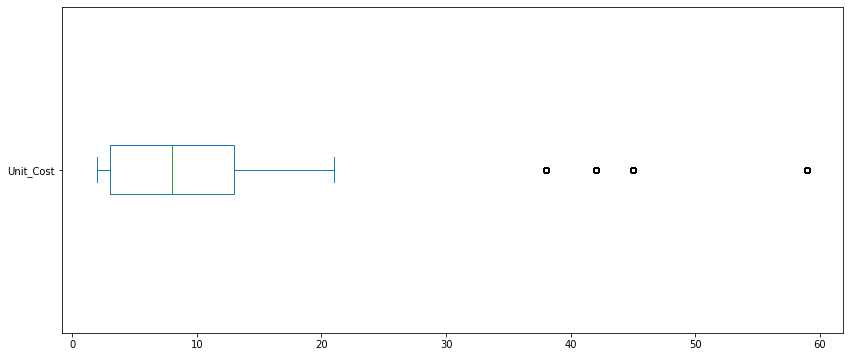

In [ ]:
sales_unit_cost.plot(kind="box", vert=False, figsize=(14,6))

Lets create a density plot for the unit cost and draw the mean and median lines for better understanding.

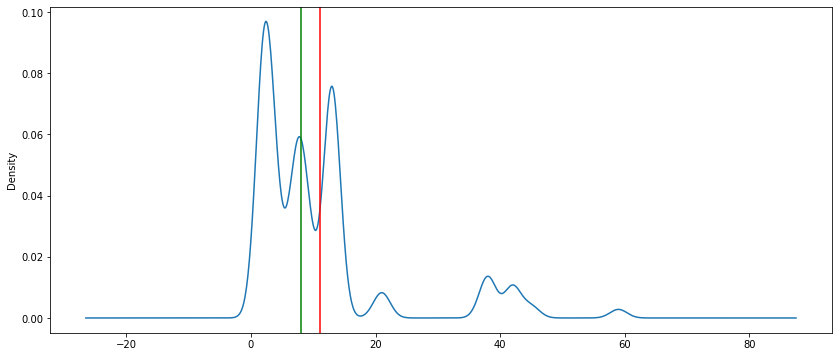

In [ ]:
density_chart = sales_unit_cost.plot(kind="density", figsize=(14,6))
density_chart.axvline(sales_unit_cost.mean(), color='red')
density_chart.axvline(sales_unit_cost.median(), color='green')

Lets create a histogram plot for the unit cost and label them.

Text(0.5, 0, 'dollars')

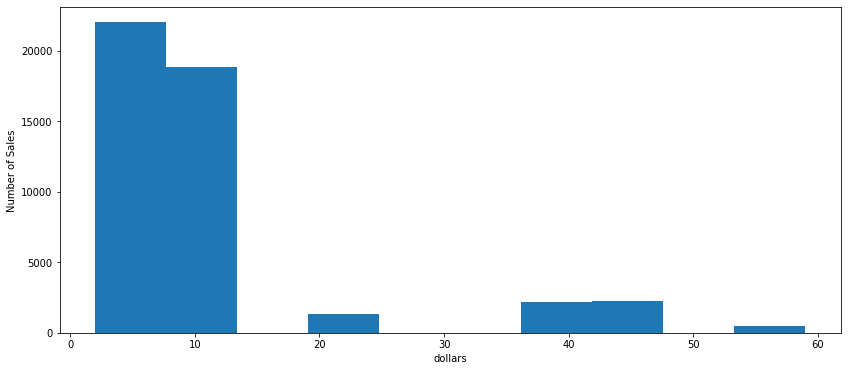

In [ ]:
density_chart = sales_unit_cost.plot(kind="hist", figsize=(14,6))
density_chart.set_ylabel("Number of Sales")
density_chart.set_xlabel("Dollars")

# Catagorical analysis and visualisation
Lets analyse the ```Age_Group``` column



In [ ]:
age_group = sales.Age_Group
age_group

0           Youth (<25)
1           Youth (<25)
2        Adults (35-64)
3        Adults (35-64)
4        Adults (35-64)
              ...      
47120    Adults (35-64)
47121    Adults (35-64)
47122    Adults (35-64)
47123    Adults (35-64)
47124    Adults (35-64)
Name: Age_Group, Length: 47125, dtype: object

Get values counts of the group

In [ ]:
age_group.value_counts()

Adults (35-64)          23765
Young Adults (25-34)    15846
Youth (<25)              7220
Seniors (64+)             294
Name: Age_Group, dtype: int64

Print a pie chart for the same data

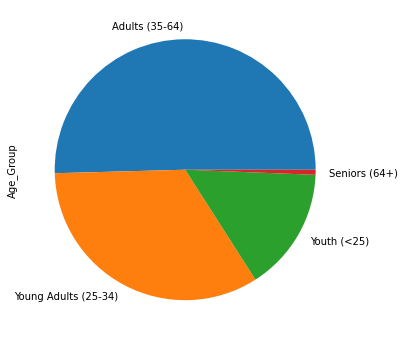

In [ ]:
age_group.value_counts().plot(kind='pie', figsize=(6,6))

Print a bar chart for the same data

Text(0.5, 0, 'Age group')

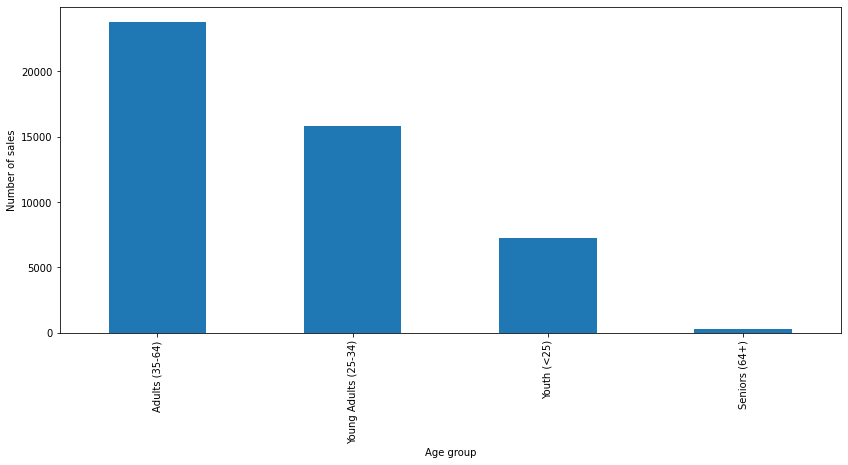

In [ ]:
chart = age_group.value_counts().plot(kind='bar', figsize=(14,6))
chart.set_ylabel("Number of sales")
chart.set_xlabel("Age group")

# Relationship between the columns
Can we find any relationship between the sales data columns?



Get a correlation data set

In [ ]:
correlation = sales.corr()
correlation

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.003753,-0.014700,-0.001137,0.005879,0.010824,0.010420,0.005573,0.008953
Year,-0.003753,1.000000,0.023478,-0.028792,-0.015673,-0.015643,-0.024066,-0.025788,-0.028531
Customer_Age,-0.014700,0.023478,1.000000,0.010625,0.016352,0.023690,0.041406,0.027752,0.038985
Order_Quantity,-0.001137,-0.028792,0.010625,1.000000,-0.092811,-0.119812,0.444218,0.418430,0.491632
Unit_Cost,0.005879,-0.015673,0.016352,-0.092811,1.000000,0.891018,0.331395,0.704577,0.605356
Unit_Price,0.010824,-0.015643,0.023690,-0.119812,0.891018,1.000000,0.530943,0.544084,0.614343
Profit,0.010420,-0.024066,0.041406,0.444218,0.331395,0.530943,1.000000,0.531500,0.857186
Cost,0.005573,-0.025788,0.027752,0.418430,0.704577,0.544084,0.531500,1.000000,0.891835
Revenue,0.008953,-0.028531,0.038985,0.491632,0.605356,0.614343,0.857186,0.891835,1.000000


Create a correlation figure

([<matplotlib.axis.YTick at 0x7fafa545fed0>,
 [Text(0, 0, 'Day'),
  Text(0, 0, 'Year'),
  Text(0, 0, 'Customer_Age'),
  Text(0, 0, 'Order_Quantity'),
  Text(0, 0, 'Unit_Cost'),
  Text(0, 0, 'Unit_Price'),
  Text(0, 0, 'Profit'),
  Text(0, 0, 'Cost'),
  Text(0, 0, 'Revenue')])

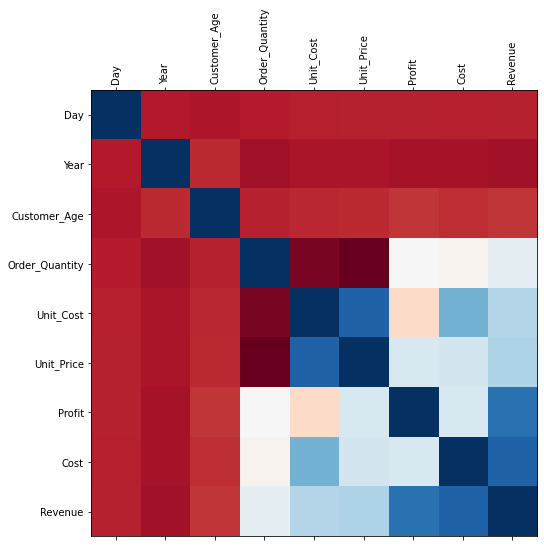

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(correlation, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(correlation.columns)),correlation.columns,rotation='vertical')
plt.yticks(range(len(correlation.columns)),correlation.columns)

Create a scattered figure

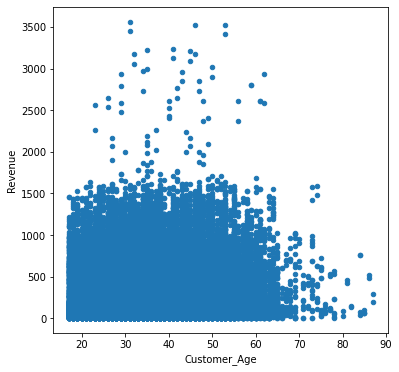

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

# Column Wrangling
We can create new columns or modify existing ones



### Add and calculate a new `Revenue_per_age` column

In [ ]:
sales.Revenue_per_age = sales.Revenue / sales.Customer_Age
sales.Revenue_per_age.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
dtype: float64

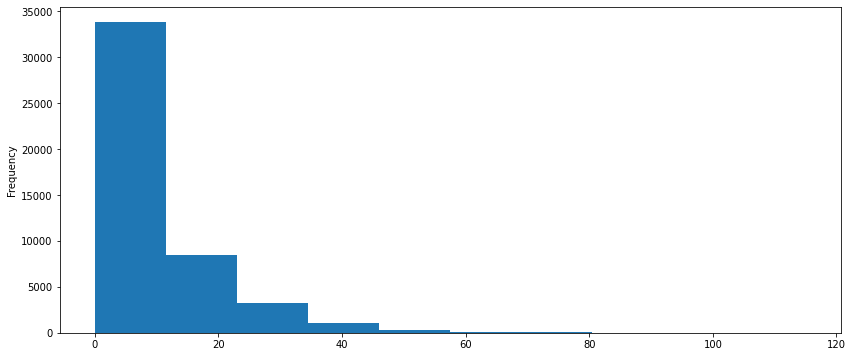

In [ ]:
sales.Revenue_per_age.plot(kind='hist' ,figsize=(14,6))

### Modify all `Unit_Price` values adding 3% tax to them

In [ ]:
sales.Unit_Price.head()

0    4.212
1    4.212
2    4.212
3    4.212
4    4.212
Name: Unit_Price, dtype: float64

In [ ]:
sales.Unit_Price *= 1.3
sales.Unit_Price.head()

# Selection and Indexing

### Get all the sales made in `Kentucky`



In [ ]:
sales.loc[sales.State == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1.0,45.0,4.2120,63.0,45.0,108.0
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1.0,45.0,4.2120,63.0,45.0,108.0
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12.0,8.0,0.7722,142.0,96.0,238.0
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14.0,8.0,0.7722,165.0,112.0,277.0
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29.0,13.0,1.2285,537.0,377.0,914.0
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31.0,13.0,1.2285,574.0,403.0,977.0


### Get the mean revenue of the `Adults (35-64)` sales group

In [ ]:
sales.loc[sales.Age_Group == 'Adults (35-64)', 'Revenue'].mean()

316.56964315771756